# NetworkX getting started: Filtering and Drawing

This tutorial provides a quick networkX introduction. There are more jupyter notebooks which covers the different topics in detail. 

Content:
- Filtering nodes and edges
- Visualizing node and edge properties

See also: https://networkx.github.io/documentation/stable/tutorial.html

## Importing required libraries and define some auxiliary functions

In [17]:
import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
from random import random
import seaborn as sns
import collections
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [18]:
module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [19]:
from graphutil.print import print_edges_with_attributes, print_network_information

In [20]:
def random_color():
     return [random(), random(), random(), 0.5] 

## Visualizing edge properties

In [21]:
G = nx.Graph()
G.add_node("Michi")
G.add_node("Alex")
G.add_node("Nadja")
G.add_node("Felix")
G.add_node("Valentin")
G.add_node("Dominik")
G.add_node("Julia")
G.add_node("Louis")

G.add_edge("Michi", "Dominik", weight=2)
G.add_edge("Michi", "Alex", weight=1)
G.add_edge("Michi", "Felix", weight=1)
G.add_edge("Felix", "Dominik", weight=1)
G.add_edge("Felix", "Valentin", weight=0.5)
G.add_edge("Alex", "Nadja", weight=1)
G.add_edge("Alex", "Dominik", weight=0.5)
G.add_edge("Louis", "Julia", weight=1)

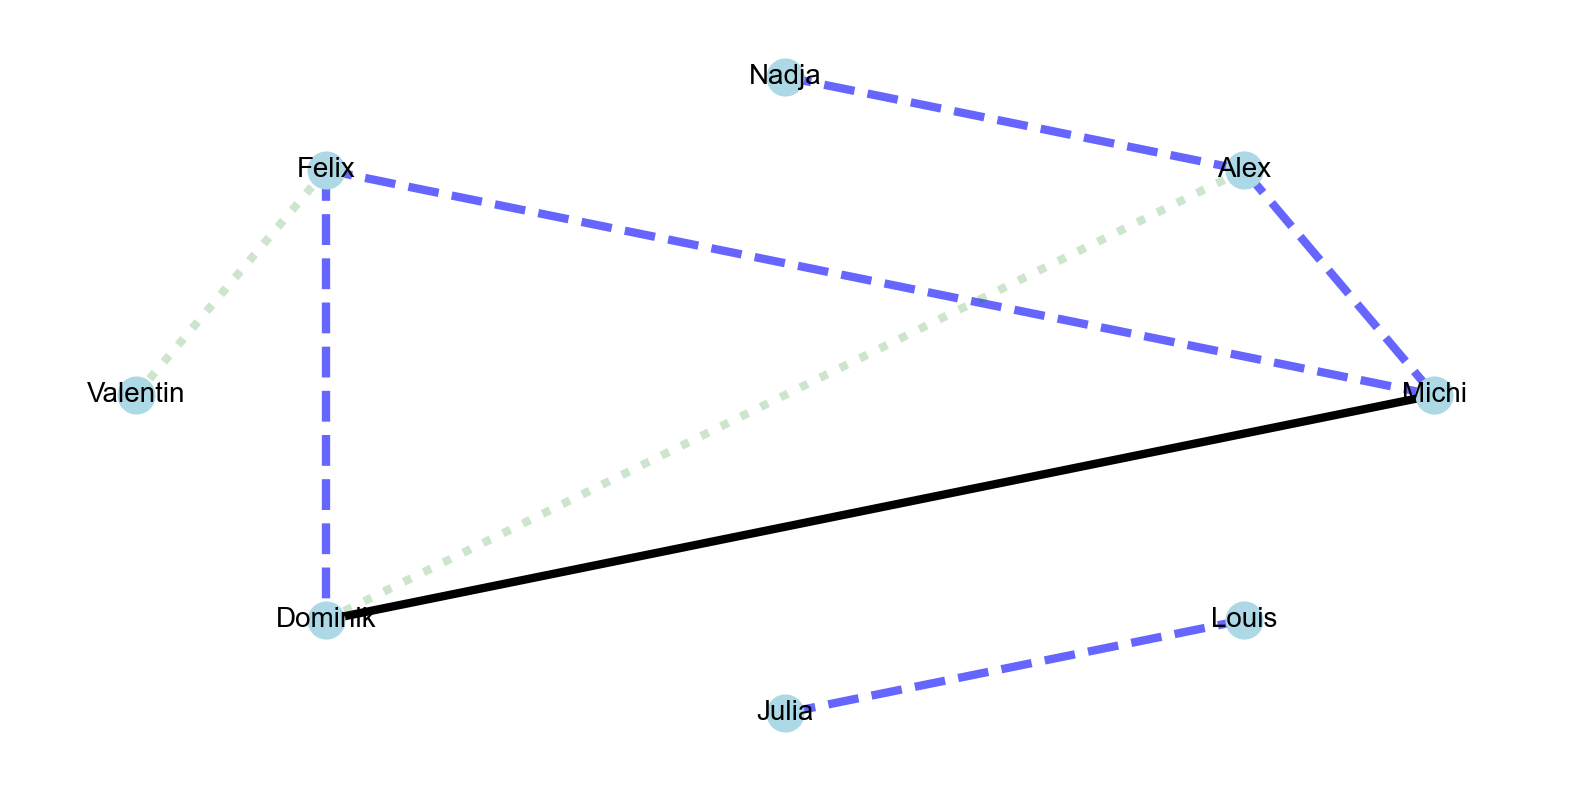

In [22]:
# Group edges by weight
large = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 1]
medium = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 1]
small = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < 1]

# Calculate positions
pos = nx.circular_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=large,width=6)
nx.draw_networkx_edges(G, pos, edgelist=medium,width=6, alpha=0.6, edge_color='b', style='dashed')
nx.draw_networkx_edges(G, pos, edgelist=small,width=6, alpha=0.2, edge_color='g', style='dotted')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

## Filtering and visualize node properties

In [23]:
schoolday_graph = nx.read_gexf("../../data/sp_data_school_day_1_g.gexf")
print_network_information(schoolday_graph)

Information for given Graph with name '':
	Graph is directed: False
	Number of nodes: 236
	Number of edges: 5899


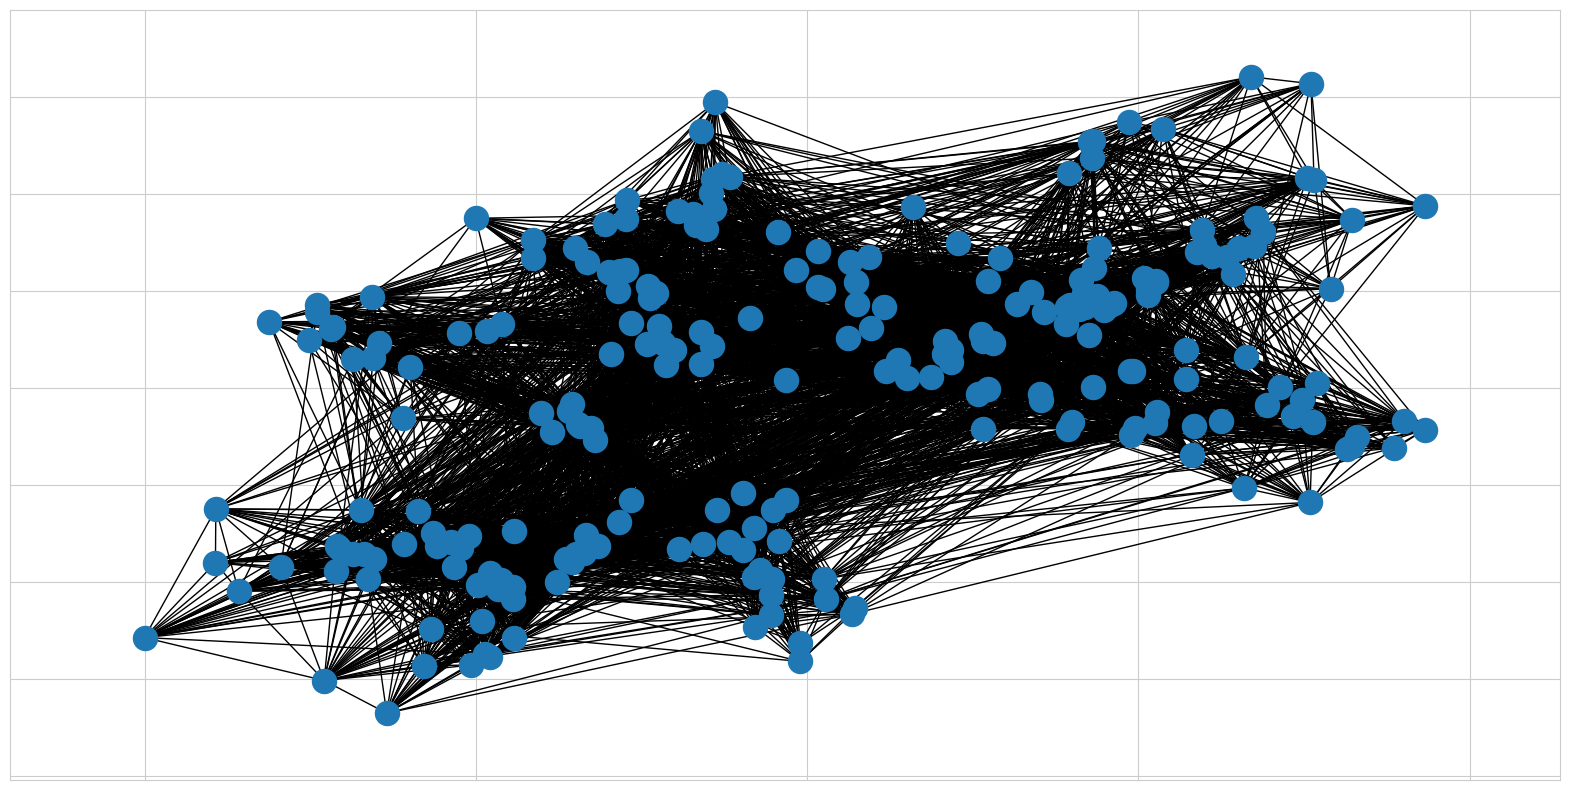

In [24]:
pos = nx.drawing.layout.spring_layout(schoolday_graph, weight="duration")
nx.draw_networkx(schoolday_graph, pos=pos, with_labels=False)
plt.show()

In [25]:
print_edges_with_attributes(schoolday_graph, limit=20)

('1789', '1821', {'duration': 20, 'count': 1, 'id': '0'})
('1789', '1783', {'duration': 300, 'count': 13, 'id': '1'})
('1789', '1778', {'duration': 740, 'count': 23, 'id': '2'})
('1789', '1722', {'duration': 20, 'count': 1, 'id': '3'})
('1789', '1902', {'duration': 20, 'count': 1, 'id': '4'})
('1789', '1892', {'duration': 20, 'count': 1, 'id': '5'})
('1789', '1775', {'duration': 320, 'count': 13, 'id': '6'})
('1789', '1774', {'duration': 100, 'count': 5, 'id': '7'})
('1789', '1711', {'duration': 260, 'count': 8, 'id': '8'})
('1789', '1770', {'duration': 20, 'count': 1, 'id': '9'})
('1789', '1772', {'duration': 260, 'count': 7, 'id': '10'})
('1789', '1732', {'duration': 20, 'count': 1, 'id': '11'})
('1789', '1779', {'duration': 20, 'count': 1, 'id': '12'})
('1789', '1613', {'duration': 60, 'count': 3, 'id': '13'})
('1789', '1500', {'duration': 20, 'count': 1, 'id': '14'})
('1789', '1759', {'duration': 160, 'count': 8, 'id': '15'})
('1789', '1757', {'duration': 1220, 'count': 32, 'id': '

## Histogram visualizing the count durations

<Axes: >

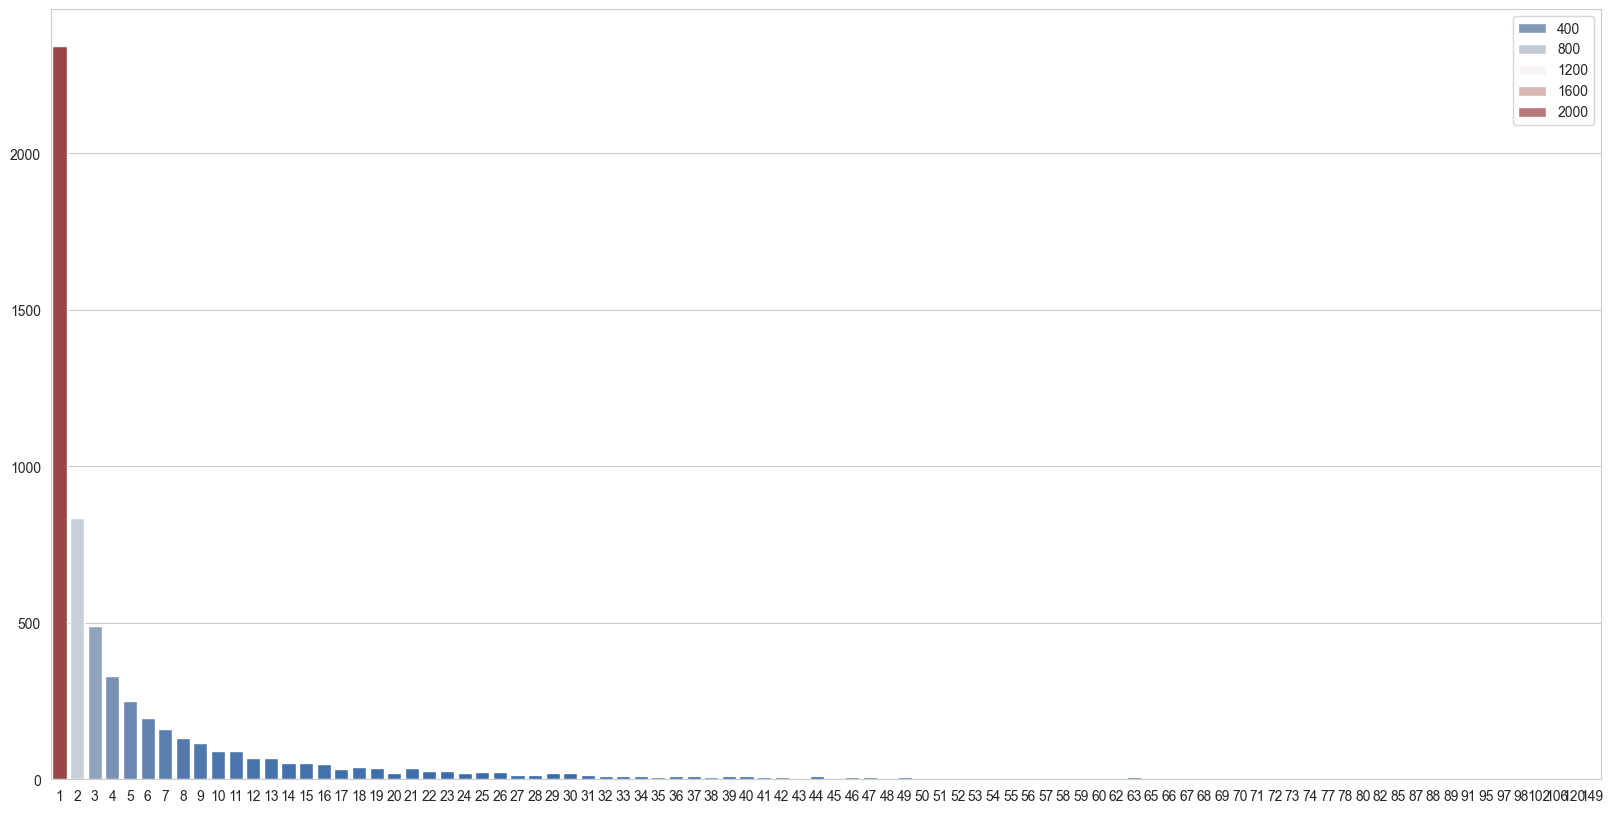

In [35]:
counts = [c for (_, _, c) in list(schoolday_graph.edges(data="count"))]
counter = collections.Counter(counts)
x = list(counter.keys())
y = list(counter.values())
sns.barplot(x=x, y=y, hue=y, palette="vlag")

## Create subgroups of edges communicating more & less than 50 times 

In [27]:
limit = 50
communicating_morethan_fiftytimes = [(s, t, v) for (s,t,v) in list(schoolday_graph.edges().data()) if v["count"] > limit ]
communicating_less_or_equal_fiftytimes = [(s, t, v) for (s,t,v) in list(schoolday_graph.edges().data()) if v["count"] <= limit ]
print(*communicating_morethan_fiftytimes[:10], sep="\n")
print(len(communicating_morethan_fiftytimes))

('1780', '1833', {'duration': 2860, 'count': 74, 'id': '77'})
('1772', '1766', {'duration': 1860, 'count': 55, 'id': '493'})
('1838', '1909', {'duration': 3460, 'count': 74, 'id': '502'})
('1695', '1920', {'duration': 4860, 'count': 98, 'id': '754'})
('1695', '1673', {'duration': 1980, 'count': 55, 'id': '777'})
('1695', '1666', {'duration': 4440, 'count': 91, 'id': '805'})
('1695', '1661', {'duration': 1460, 'count': 51, 'id': '809'})
('1675', '1656', {'duration': 3000, 'count': 74, 'id': '956'})
('1551', '1579', {'duration': 2080, 'count': 60, 'id': '1166'})
('1759', '1711', {'duration': 3800, 'count': 80, 'id': '1229'})
74


## Collect nodes of edges with communication count > 50

In [28]:
remaining_nodes = set()
for (s,t,_) in communicating_morethan_fiftytimes:
    remaining_nodes.add(s)
    remaining_nodes.add(t)
print(len(remaining_nodes))

110


## Create subgraph with most communicating nodes and edges

In [29]:
subgraph = schoolday_graph.subgraph(remaining_nodes).copy()
for (s, t, _) in communicating_less_or_equal_fiftytimes:
    if subgraph.has_edge(s, t):
        subgraph.remove_edge(s, t)

print_network_information(subgraph)

Information for given Graph with name '':
	Graph is directed: False
	Number of nodes: 110
	Number of edges: 74


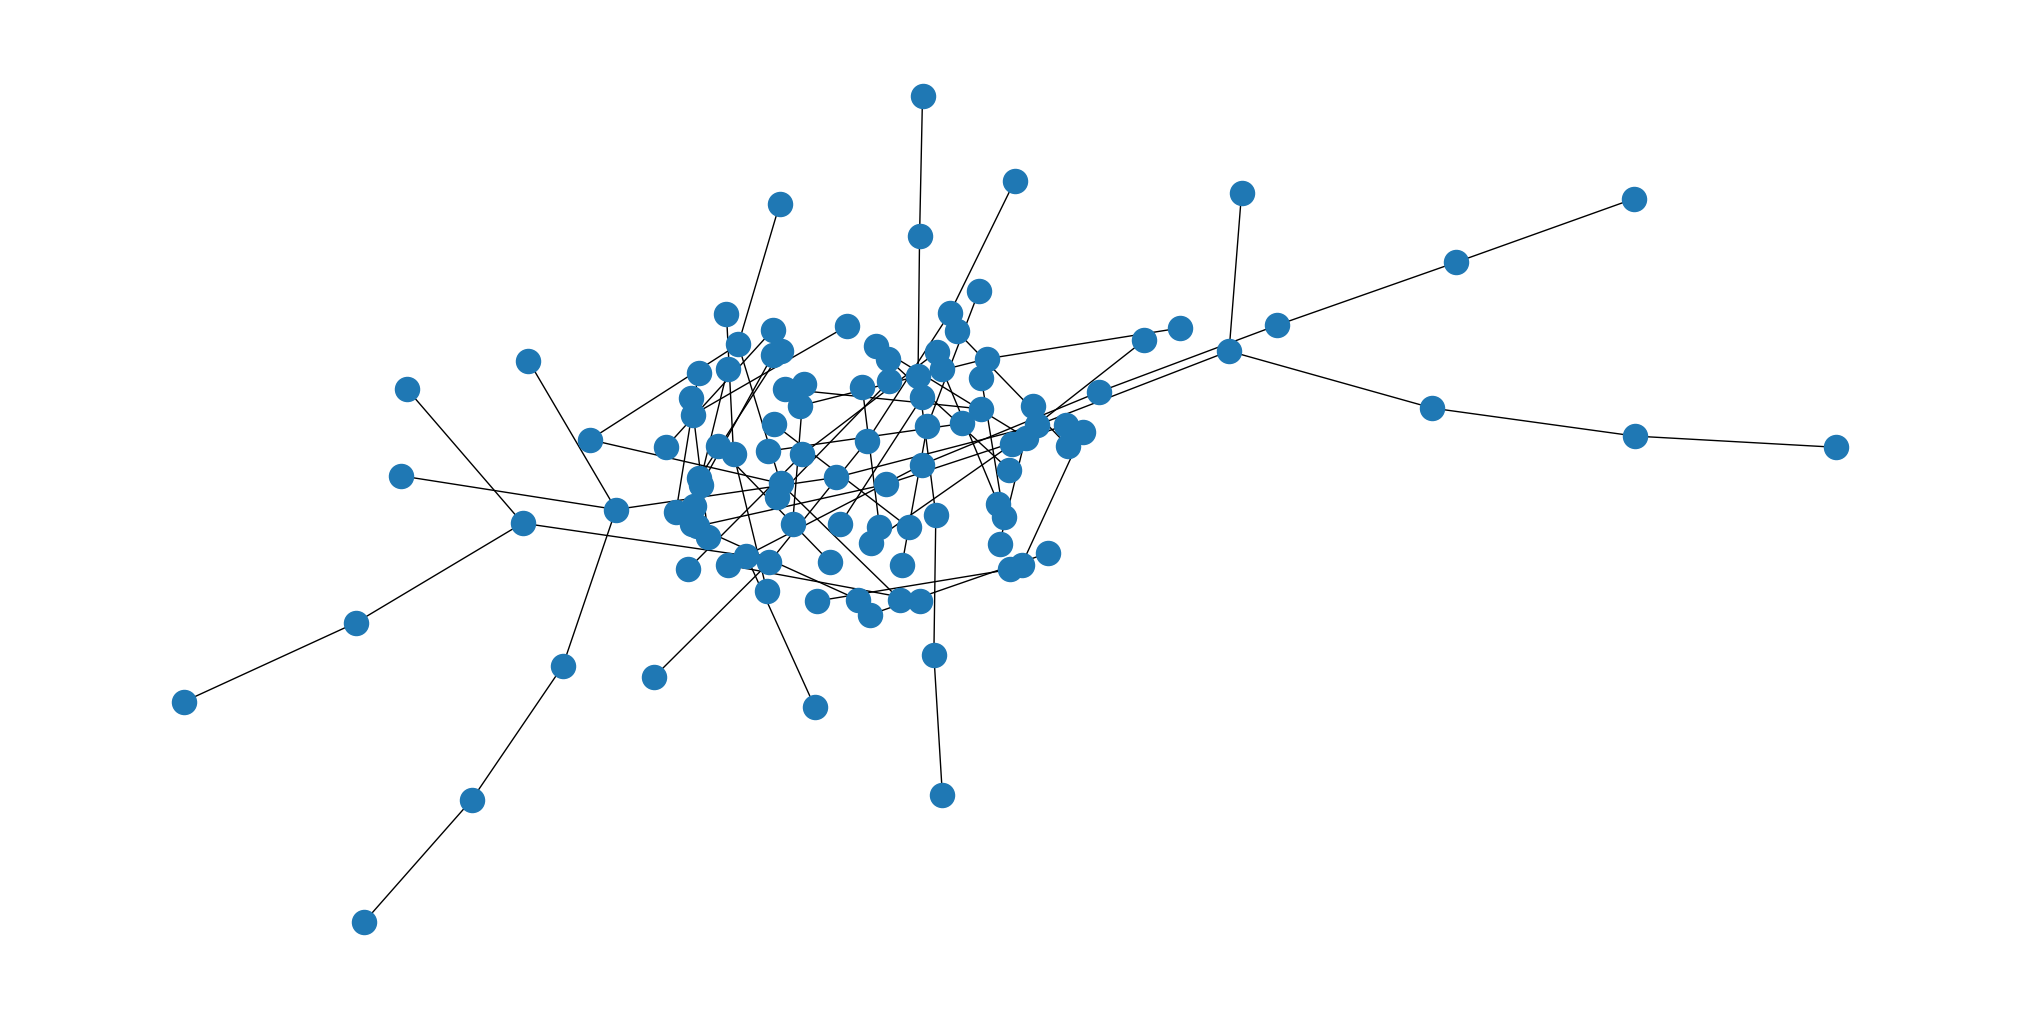

In [30]:
nx.draw_kamada_kawai(subgraph, with_labels=False)
plt.show()

## Color nodes by class

In [31]:
from collections import defaultdict

data = list(subgraph.nodes().data())
classes = {attributes["classname"] for (id, attributes) in data}

people_per_class = defaultdict(list)
for (id, attributes) in list(subgraph.nodes().data()):
    people_per_class[attributes["classname"]].append(id)
print(len(list(people_per_class.keys())))

11


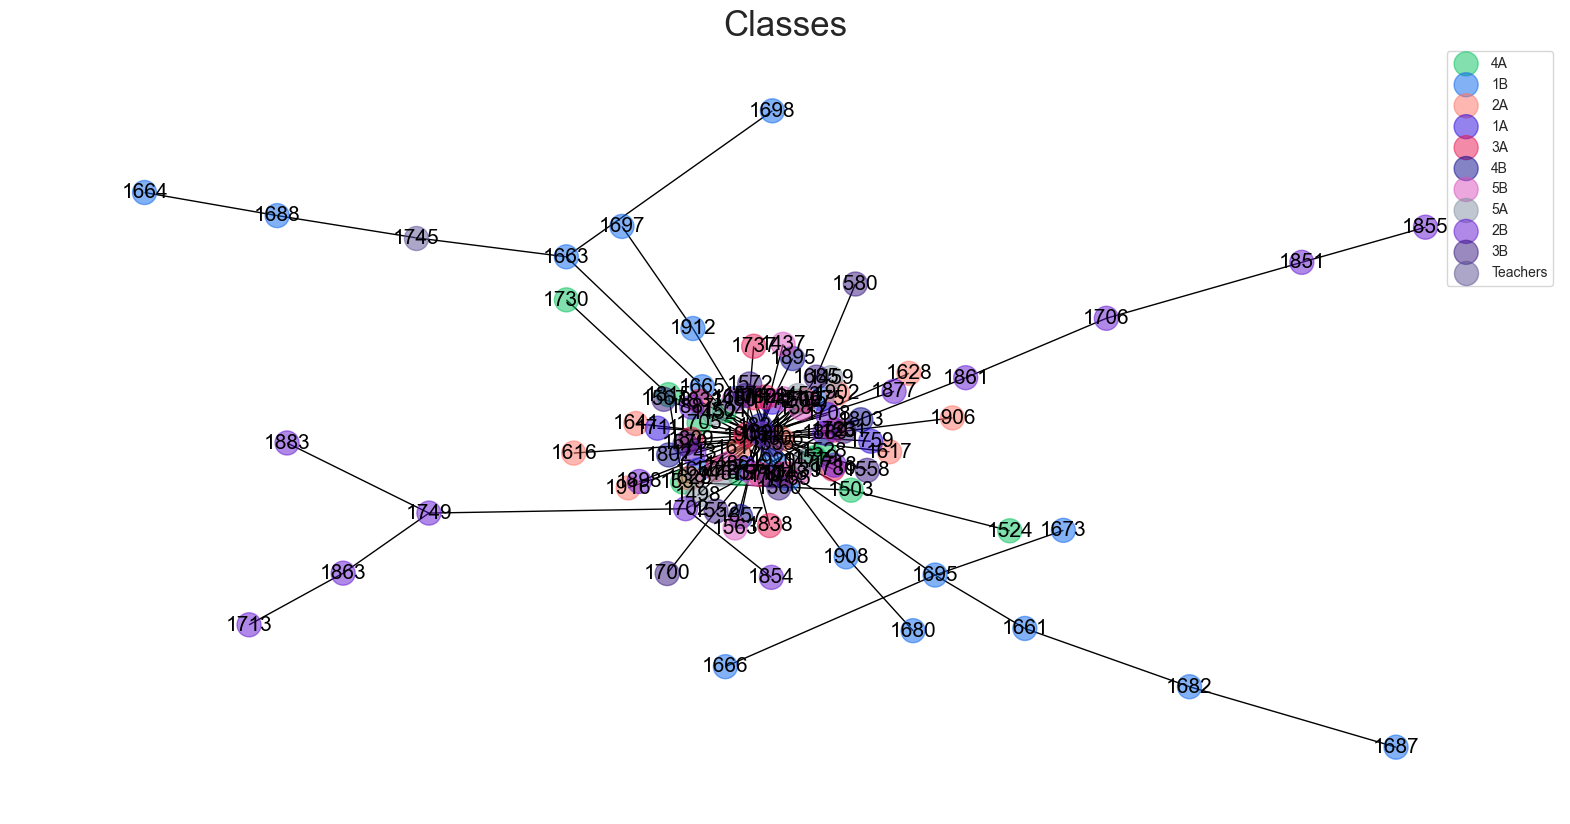

In [32]:
random_colors = [random_color() for _ in range(len(list(people_per_class.keys())))]

pos = nx.drawing.layout.kamada_kawai_layout(subgraph, weight = 'count')

i = 0
for (schoolclass, members) in people_per_class.items():
    node_color = len(members) * [random_colors[i]]
    i = i + 1
    nx.draw_networkx_nodes(subgraph, pos,  nodelist=members, node_color=node_color, label = schoolclass)                                                                                                        

nx.draw_networkx_edges(subgraph, pos)
nx.draw_networkx_labels(subgraph, pos, font_size=15, font_family='sans-serif')

#set title, legend and show plot
plt.title('Classes', fontdict={'fontsize': 25})
plt.legend()
plt.axis('off')
plt.show()